<a href="https://colab.research.google.com/github/muhamadfarrelrizqullah/machinelearning_2023/blob/main/Quiz2_Kelompok4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://raw.githubusercontent.com/muhamadfarrelrizqullah/machinelearning_2023/main/team4Cihuy.jpg">
<table>
  <tr>
    <th>Mata Kuliah </th>
    <td>Machine Learning</td>
  </tr>
  <tr>
    <th>Quiz 2</th>
    <td>Program OCR KTP</td>
  </tr>

  <tr>
    <th>Kelompok</th>
    <td>Kelompok 4</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td>
    <p> Moch. Nadi Rafli Maulana / 2141720188
    <p> Muhamad Farrel Rizqullah / 2141720243
    <p> Muhammad Lukman Hakim / 2141720109
    <p> Ramadhan Maulana Akbar S / 2041720072
    <p> Tifa Amalina / 2141720033
     </td>
  </tr>
</table>

## **Quiz2 - Program OCR KTP**

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (11.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import pytesseract

**Percobaan 1**

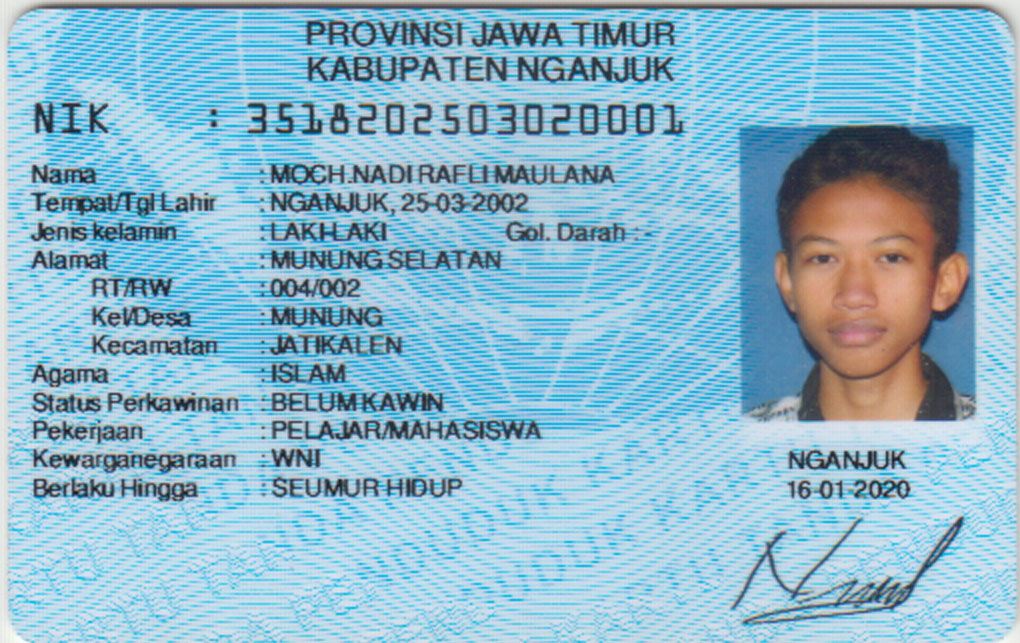

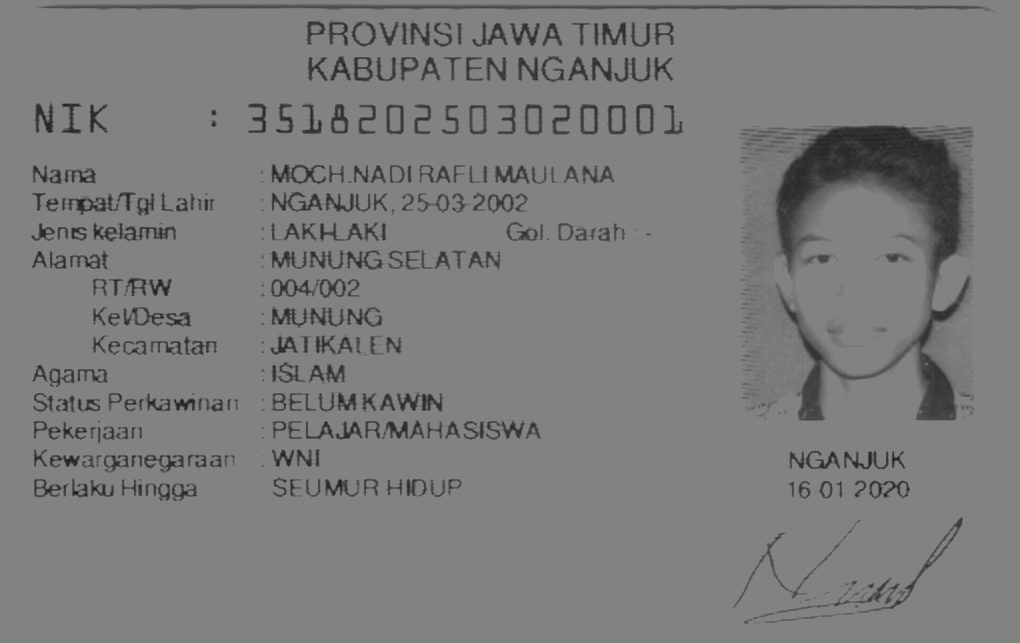

In [33]:
image_path = '/content/2141720188-ktp.jpg'
image = cv2.imread(image_path)
cv2_imshow(image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, image = cv2.threshold(image, thresh=130, maxval=255, type=cv2.THRESH_TRUNC)
cv2_imshow(image)

In [37]:
def extract_information(text):
    information = {}

    information['NIK'] = find_and_extract(text, 'NIK — :', ' —')
    information['Nama'] = process_nama(find_and_extract(text, 'Nama - ', '\n'))
    information['Tempat/Tgl Lahir'] = process_ttl(find_and_extract(text, 'TempatTgi Lahir', '\n'))
    information['Jenis Kelamin'] = process_jenis_kelamin(find_and_extract(text, 'Jenis kelamun', '\n'))
    information['Gol. Darah'] = process_golongan_darah(find_and_extract(text, 'Gol. Darah', '\n'))
    information['Alamat'] = process_alamat(find_and_extract(text, 'Alamat :', '\n'))
    information['RT/RW'] = find_and_extract(text, 'RTRW :', '\n')
    information['Kel/Desa'] = process_kel_desa(find_and_extract(text, 'KeWWesa :', '\n'))
    information['Kecamatan'] = find_and_extract(text, 'Kecamatan — :', '\n')
    information['Agama'] = find_and_extract(text, 'Agama “', '\n')
    information['Status Perkawinan'] = process_status_perkawinan(find_and_extract(text, 'Status Perkawinan -', '\n'))
    information['Pekerjaan'] = find_and_extract(text, 'Pekerjaan', '\n')
    information['Kewarganegaraan'] = process_kewarganegaraan(find_and_extract(text, 'Kewarganegaraan', '\n'))
    information['Berlaku Hingga'] = process_berlaku_hingga(find_and_extract(text, 'Berlaku Hingga', '\n'))

    return information

def find_and_extract(text, start_str, end_str):
    start_index = text.find(start_str) + len(start_str)
    end_index = text.find(end_str, start_index)
    return text[start_index:end_index].strip()

def process_nama(nama_raw):
    nama_gabung = nama_raw.replace('RAF ', 'RAFLI ')
    nama_tanpa_li = nama_gabung.replace(' LI', '')
    return nama_tanpa_li

def process_ttl(ttl_raw):
    if '-' in ttl_raw or len(ttl_raw) == 10:
        return ttl_raw

    tempat_lahir, tanggal_lahir_raw = ttl_raw.split(',')
    tanggal_lahir_raw = tanggal_lahir_raw.replace(" ", "")
    tanggal, bulan, tahun = tanggal_lahir_raw[:2], tanggal_lahir_raw[2:4], tanggal_lahir_raw[4:]
    return f"{tempat_lahir.strip()}, {tanggal}-{bulan}-{tahun}"

def process_jenis_kelamin(jk_raw):
    jk_normalized = jk_raw.upper()
    default_jenis_kelamin = "PEREMPUAN"
    return "LAKI-LAKI" if "LAK" in jk_normalized else default_jenis_kelamin

def process_golongan_darah(darah_raw):
    golongan_darah = darah_raw.split()[0]
    default_golongan_darah = "-"
    return golongan_darah if golongan_darah.isalpha() else default_golongan_darah

def process_alamat(alamat_raw):
    return ' '.join(word for word in alamat_raw.split() if word.isupper())

def process_kel_desa(keldesa_raw):
    return ' '.join(word for word in keldesa_raw.split() if word.isupper())

def process_status_perkawinan(status_raw):
    status_perkawinan = ''.join(char for char in status_raw if char.isupper())
    return status_perkawinan.replace('BELUMKAWIN', 'BELUM KAWIN')

def process_kewarganegaraan(kewarganegaraan_raw):
    kewarganegaraan = ''.join(char for char in kewarganegaraan_raw if char.isupper())
    kewarganegaraan = kewarganegaraan.replace('.WNI nganjuk', 'WNI')
    return kewarganegaraan.replace('WNINGANJUK', 'WNI')

def process_berlaku_hingga(berlaku_raw):
    berlaku = ''.join(char for char in berlaku_raw if char.isupper())
    return berlaku.replace('SEUMURHIDUP', 'SEUMUR HIDUP')

custom_config = r'--oem 3 --psm 6 --tessdata-dir /content/'
result = pytesseract.image_to_string(image, lang='ind', config=custom_config)
print(result)
information_dict = extract_information(result)

for key, value in information_dict.items():
    print(f"{key}: {value}")

PROVINSI JAWA TIMUR
KABUPATEN NGANJUK
NIK — : 3518202503020001 — .
Nama - MOCH.NADI RAF LI MAULANA
TempatTgi Lahir NGANJUK, 2503 2002
Jenis kelamun :LAKH AKI Gol. Darah ' - A
Alamat : MUNUNG SELATAN il w
RTRW :004/002
KeWWesa : MUNUNG ia m
Kecamatan — :JATIKALEN
Agama “ ISLAM
Status Perkawinan - BELUMKAWIN a m
Pekerjaan PELAJAR/MAHASISWA
Kewarganegaraan . WNI NGANJUK
Berlaku Hingga SEUMUR HIDUP 1601 2020

NIK: 3518202503020001
Nama: MOCH.NADI RAFLI MAULANA
Tempat/Tgl Lahir: NGANJUK, 25-03-2002
Jenis Kelamin: LAKI-LAKI
Gol. Darah: -
Alamat: MUNUNG SELATAN
RT/RW: 004/002
Kel/Desa: MUNUNG
Kecamatan: JATIKALEN
Agama: ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan: PELAJAR/MAHASISWA
Kewarganegaraan: WNI
Berlaku Hingga: SEUMUR HIDUP


**Percobaan 2**

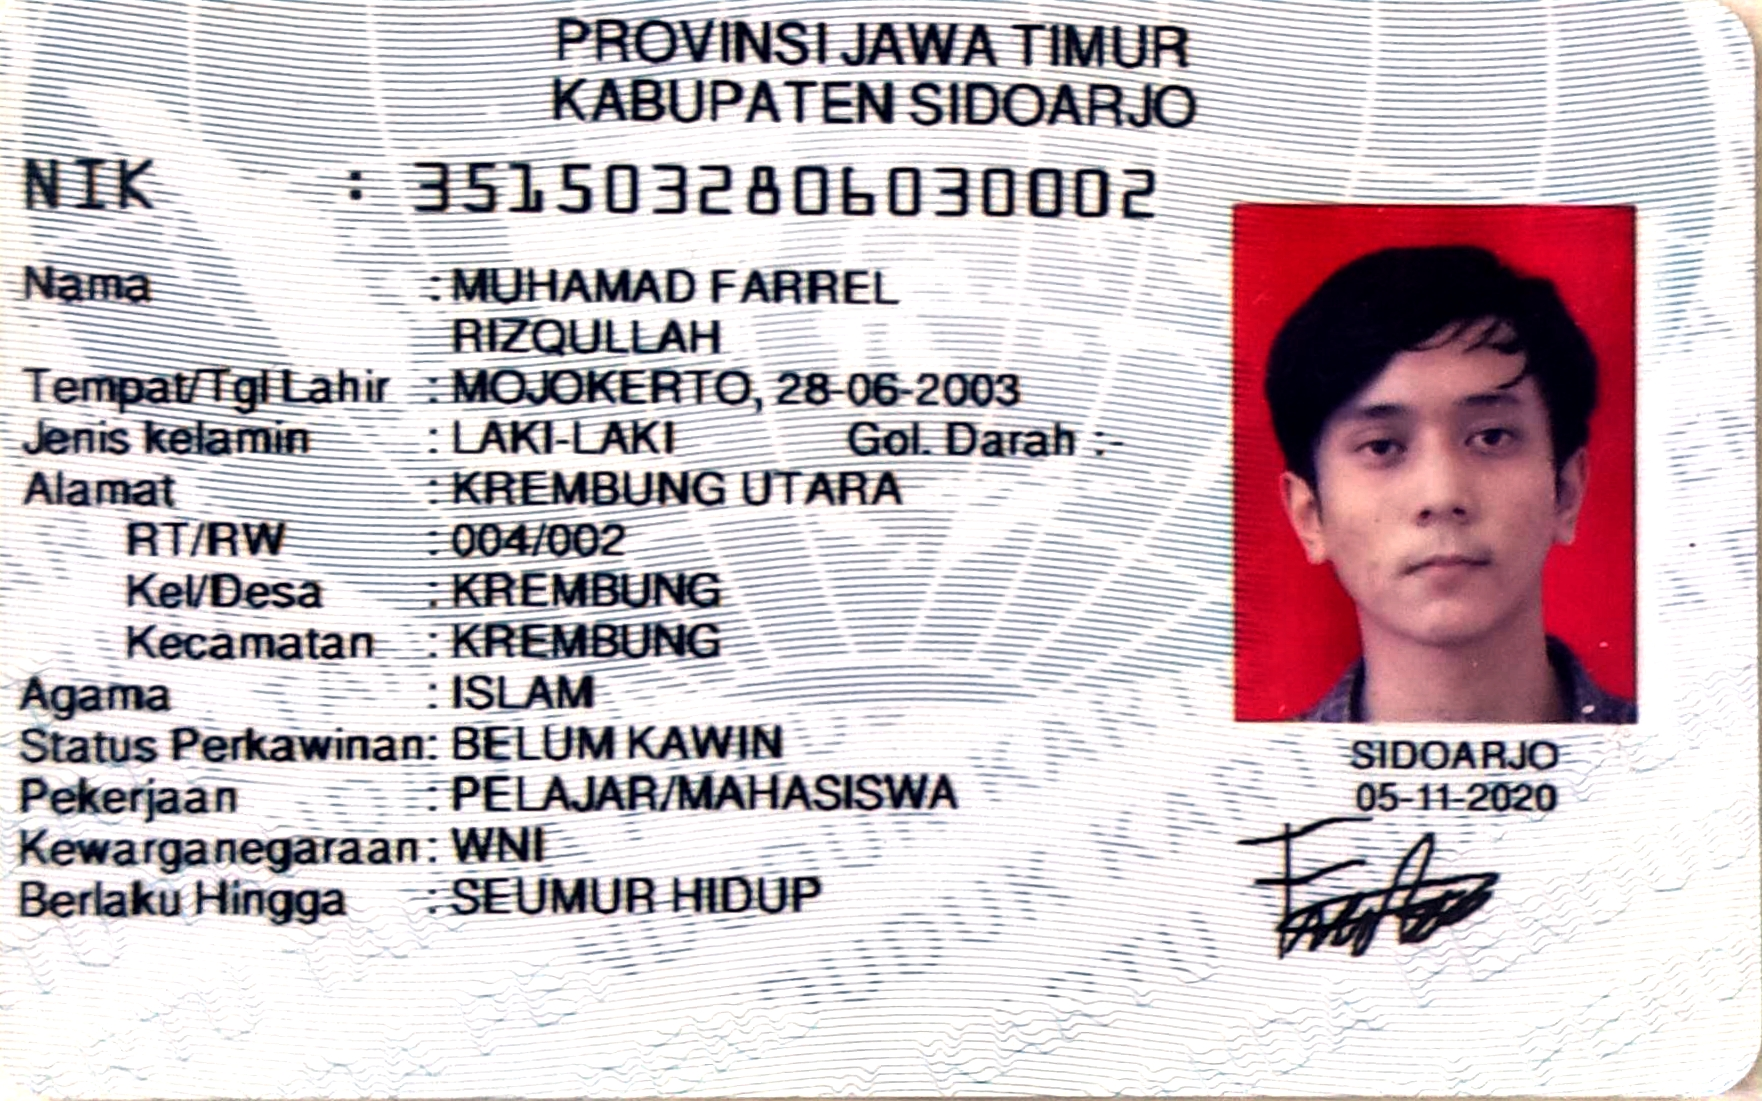

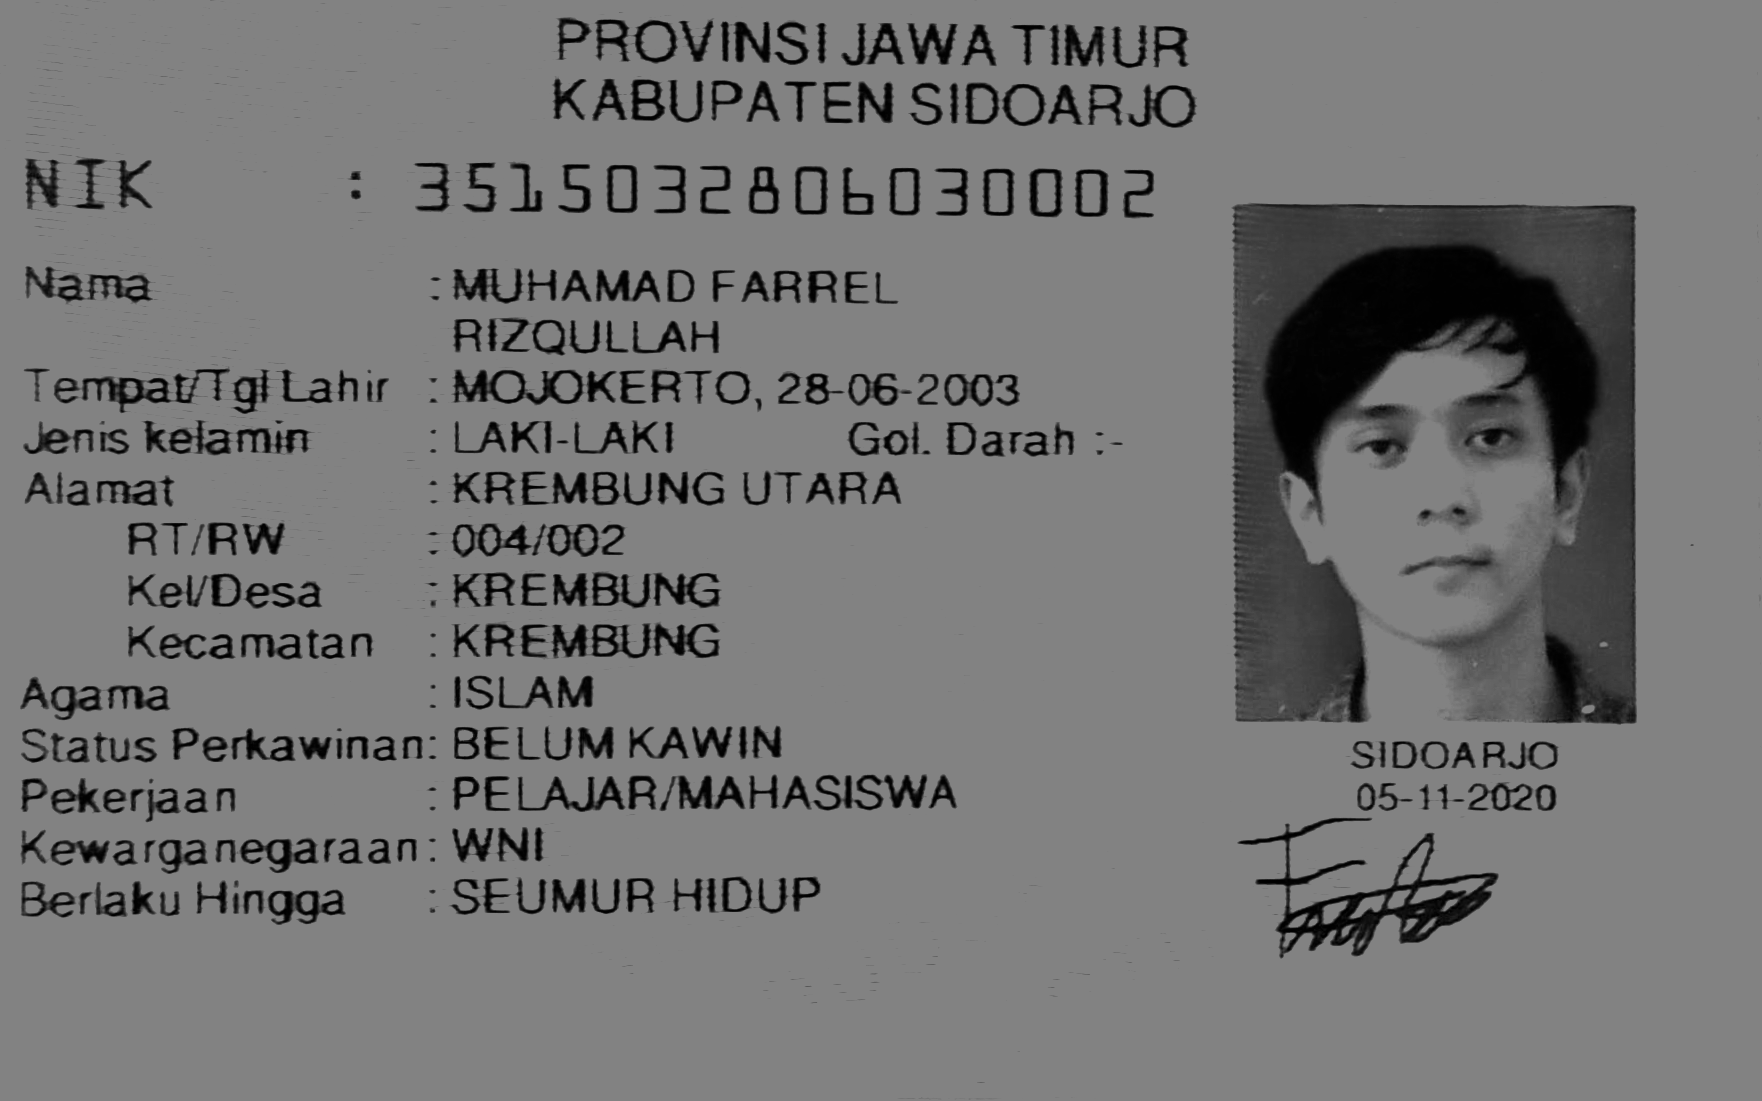

In [40]:
image_path = '/content/IMG_20231201_081449.jpg'
image = cv2.imread(image_path)
cv2_imshow(image)

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

_, image = cv2.threshold(image, thresh=130, maxval=255, type=cv2.THRESH_TRUNC)
cv2_imshow(image)

In [63]:
def extract_information(text):
    information = {}

    information['NIK'] = process_nik(find_and_extract(text, 'NIK :', '\n'))
    information['Nama'] = process_nama(find_and_extract(text, 'Nama -', '\n'))
    information['Tempat/Tgl Lahir'] = process_ttl(find_and_extract(text, 'TempatrTgiLahir :', '\n'))
    information['Jenis Kelamin'] = process_jenis_kelamin(find_and_extract(text, 'Jenis kelamin', '\n'))
    information['Gol. Darah'] = process_golongan_darah(find_and_extract(text, 'Gol. Darah', '\n'))
    information['Alamat'] = process_alamat(find_and_extract(text, 'Alamat', '\n'))
    information['RT/RW'] = find_and_extract(text, 'RT/RW -', '—l')
    information['Kel/Desa'] = process_kel_desa(find_and_extract(text, 'KeVDesa :', '\n'))
    information['Kecamatan'] = process_kecamatan(find_and_extract(text, 'Kecamatan :', '\n'))
    information['Agama'] = process_agama(find_and_extract(text, 'Agama :', '\n'))
    information['Status Perkawinan'] = process_status_perkawinan(find_and_extract(text, 'Status Perkawinan:', '\n'))
    information['Pekerjaan'] = process_pekerjaan(find_and_extract(text, 'Pekerjaan :', '\n'))
    information['Kewarganegaraan'] = find_and_extract(text, 'Kewarganegaraan:', '\n')
    information['Berlaku Hingga'] = process_berlaku_hingga(find_and_extract(text, 'Berlaku Hingga — :', '\n'))

    return information

def find_and_extract(text, start_str, end_str):
    start_index = text.find(start_str) + len(start_str)
    end_index = text.find(end_str, start_index)

    return text[start_index:end_index].strip()

def process_nik(nik_raw):
    nik_baru = nik_raw.replace('L', '6')
    return nik_baru

def process_nama(nama_raw):
    nama_akhir = " RIZQULLAH"
    nama_gabung = nama_raw + nama_akhir
    return nama_gabung

def process_ttl(ttl_raw):
    if '-' in ttl_raw or len(ttl_raw) == 10:
        return ttl_raw

    tempat_lahir, tanggal_lahir_raw = ttl_raw.split(',')
    tanggal_lahir_raw = tanggal_lahir_raw.replace(" ", "")
    tanggal, bulan, tahun = tanggal_lahir_raw[:2], tanggal_lahir_raw[2:4], tanggal_lahir_raw[4:]
    return f"{tempat_lahir.strip()}, {tanggal}-{bulan}-{tahun}"

def process_jenis_kelamin(jk_raw):
    jk_normalized = jk_raw.upper()
    default_jenis_kelamin = "PEREMPUAN"
    return "LAKI-LAKI" if "LAK" in jk_normalized else default_jenis_kelamin

def process_golongan_darah(darah_raw):
    golongan_darah = darah_raw.split()[0]
    default_golongan_darah = "-"
    return golongan_darah if golongan_darah.isalpha() else default_golongan_darah

def process_alamat(alamat_raw):
    return ' '.join(word for word in alamat_raw.split() if word.isupper())

def process_kel_desa(keldesa_raw):
    return ' '.join(word for word in keldesa_raw.split() if word.isupper())

def process_kecamatan(kecamatan_raw):
    kecamatan = ''.join(char for char in kecamatan_raw if char.isupper())
    kecamatan = kecamatan.replace('KREMBUNG i', 'KREMBUNG')
    kecamatan = kecamatan.split()[0]
    return kecamatan.replace('KREMBUNG I', 'KREMBUNG')

def process_agama(agama_raw):
    agama = ''.join(char for char in agama_raw if char.isupper())
    agama = agama.replace('ISLAM S3', 'ISLAM')
    agama = agama.split()[0]
    return agama.replace('ISLAMS', 'ISLAM')

def process_status_perkawinan(status_raw):
    status_perkawinan = ''.join(char for char in status_raw if char.isupper())
    status_perkawinan = status_perkawinan.replace('BELUM KAWIN SIDOARJO', 'BELUM KAWIN')
    status_perkawinan = status_perkawinan.split()[0]
    return status_perkawinan.replace('BELUMKAWINSIDOARJO', 'BELUM KAWIN')

def process_pekerjaan(pekerjaan_raw):
    pekerjaan = ''.join(char for char in pekerjaan_raw if char.isupper())
    pekerjaan = pekerjaan.replace('PELAJAR/MAHASISWA 05-11-2020', 'PELAJAR/MAHASISWA')
    pekerjaan = pekerjaan.split()[0]
    return pekerjaan.replace('PELAJARMAHASISWA', 'PELAJAR/MAHASISWA')

def process_berlaku_hingga(berlaku_raw):
    berlaku = ''.join(char for char in berlaku_raw if char.isupper())
    berlaku = berlaku.replace('SEUMUR HiDUP %', 'SEUMUR HIDUP')
    berlaku = berlaku.split()[0]
    return berlaku.replace('SEUMURHDUP', 'SEUMUR HIDUP')

custom_config = r'--oem 3 --psm 6 --tessdata-dir /content/'
result = pytesseract.image_to_string(image, lang='ind', config=custom_config)
print(result)
information_dict = extract_information(result)

for key, value in information_dict.items():
     print(f"{key}: {value}")

PROVINSI JAWA TIMUR
KABUPATEN SIDOARJO
NIK : 351503280L030002
Nama - MUHAMAD FARREL
RIZOULLAH
TempatrTgiLahir : MOJOKERTO, 28-06-2003
Jenis kelamin : LAKI-LAKI Gol. Darah :- v
Alamat : KREMBUNG UTARA n . :
RT/RW - 004/002 —l
KeVDesa : KREMBUNG
Kecamatan : KREMBUNG i
Agama : ISLAM S3
Status Perkawinan: BELUM KAWIN SIDOARJO
Pekerjaan : PELAJAR/MAHASISWA 05-11-2020
Kewarganegaraan: WNI
Berlaku Hingga — : SEUMUR HiDUP %

NIK: 3515032806030002
Nama: MUHAMAD FARREL RIZQULLAH
Tempat/Tgl Lahir: MOJOKERTO, 28-06-2003
Jenis Kelamin: LAKI-LAKI
Gol. Darah: -
Alamat: KREMBUNG UTARA
RT/RW: 004/002
Kel/Desa: KREMBUNG
Kecamatan: KREMBUNG
Agama: ISLAM
Status Perkawinan: BELUM KAWIN
Pekerjaan: PELAJAR/MAHASISWA
Kewarganegaraan: WNI
Berlaku Hingga: SEUMUR HIDUP
